In [ ]:
#  Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#  Step 2: Load Dataset
# Dataset: SMS Spam Collection from UCI
df = pd.read_csv(
    "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
    sep="\t", header=None, names=["label", "message"]
)
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


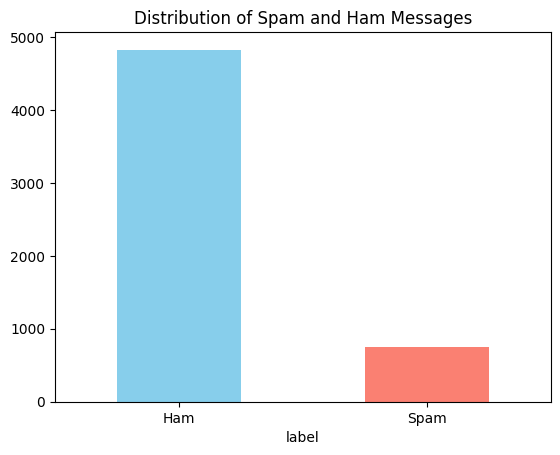

In [ ]:
#  Step 3: Explore Dataset
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Spam and Ham Messages")
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'], rotation=0)
plt.show()


In [ ]:
#  Step 4: Preprocess Labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
#  Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)


In [ ]:
# Step 6: Vectorize Text (Bag of Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
#  Step 7: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
#  Step 8: Make Predictions
y_pred = model.predict(X_test_vec)


In [ ]:
#  Step 9: Evaluate Model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9919282511210762

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



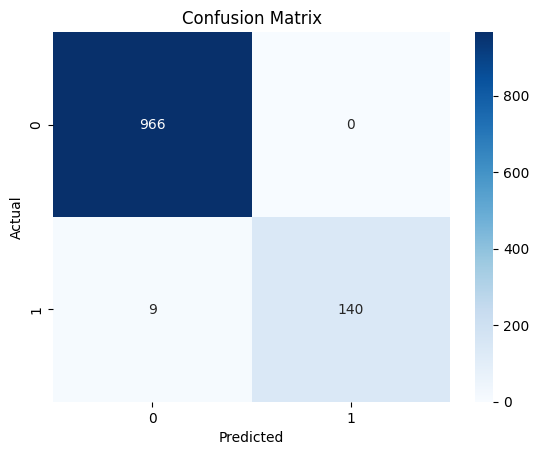

In [ ]:
#  Step 10: Show Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#  Step 11: Try Custom Message
sample = ["You've won a free iPhone! Claim it now!"]
sample_vec = vectorizer.transform(sample)
print("Message:", sample[0])
print("Prediction:", "Spam" if model.predict(sample_vec)[0] else "Ham")


Message: You've won a free iPhone! Claim it now!
Prediction: Spam
